# Springboard 5.2 - Capstone Data Wrangling

How does one go about creating a data story? You have some pointers from the material you've just gone through, but they’re probably a bit on the abstract side when you’re just getting started. Also, storytelling is an art, so you have to get your imagination going. Here are some pointers to get those creative juices flowing. In the following sections we will work step-by-step to create your first Data Story

Pick a dataset - ideally the dataset for your Capstone. If for some reason you want to do this on a different data set, you can find one on Mode Analytics or Google's public data sets directory, or pick another one you like from elsewhere.

Get going by asking the following questions and looking for the answers with some code and plots:

1. Can you count something interesting? 

2. Can you find some trends (high, low, increase, decrease, anomalies)? Medical sales have been steadily decreasing since the medical products were introduced in 2003.

3. Can you make a bar plot or a histogram? 

4. Can you compare two related quantities?

5. Can you make a scatterplot?

6. Can you make a time-series plot?

Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?

Submission Requirements: Submit links to a Github repository containing a Jupyter notebook. The notebook should contain:

The questions you asked <br>
The trends you investigated <br>
The resulting visualizations and conclusions. <br>
In case the data set is too large to commit to Github, please include a link to the data set inside the Jupyter notebook.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

dfyear = pd.read_csv("data/fs_year_csv.csv")
dfyearmonth = pd.read_csv("data/fs_year_month_csv.csv")

print(dfyear)





    Year        Type       Americas  Am Orders           APAC  APAC Orders  \
0   1986  Industrial     $34,181.88         14          $0.00            0   
1   1987  Industrial  $1,633,017.42        466          $0.00            0   
2   1988  Industrial  $2,107,702.98        483     $15,371.59            4   
3   1989  Industrial  $1,678,828.71        494         $55.00            4   
4   1990  Industrial  $2,519,181.82        621         $67.32            5   
5   1991  Industrial  $1,735,941.14        606      $3,578.06           10   
6   1992  Industrial  $2,065,393.98        513     $40,449.81           13   
7   1993  Industrial  $1,702,154.87        437     $34,715.30            8   
8   1994  Industrial  $1,805,677.58        386    $121,060.92           25   
9   1995  Industrial  $1,349,359.16        351    $187,765.53           26   
10  1996  Industrial  $1,254,762.65        357      $2,192.00           17   
11  1997  Industrial  $1,013,471.30        302     $58,665.20   

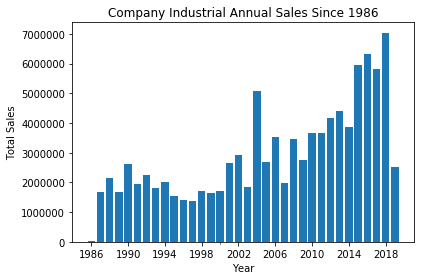

In [57]:
dfyeari = dfyear[dfyear.Type=='Industrial']
xyeari = list(dfyeari['Year'])
dfyeari = dfyeari[dfyeari.columns[2:]].replace('[\$,]', '', regex=True).astype(float)
yyeari = list(dfyeari['Total'])

figyeari, axyeari = plt.subplots()

plt.bar(xyeari, yyeari, align='center')
plt.ylabel('Total Sales')
plt.xlabel('Year')

plt.title('Company Industrial Annual Sales Since 1986')
plt.tight_layout()

axyeari.set_xticks(np.arange(1986,2020,4))
axyeari.set_xticks(np.arange(2000,2020,20), minor=True)
plt.show()






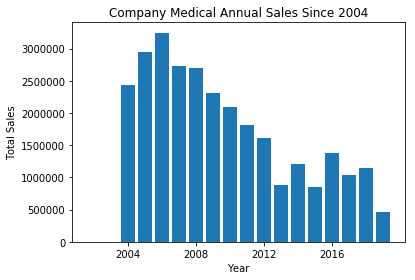

In [58]:
dfyearm = dfyear[dfyear.Type=='Medical']
xyearm = list(dfyearm['Year'])
dfyearm = dfyearm[dfyearm.columns[2:]].replace('[\$,]', '', regex=True).astype(float)
yyearm = list(dfyearm['Total'])


figyearm, axyearm = plt.subplots()

plt.bar(xyearm, yyearm, align='center')
plt.ylabel('Total Sales')
plt.xlabel('Year')

plt.title('Company Medical Annual Sales Since 2004')
plt.tight_layout()

axyearm.set_xticks(np.arange(2004,2020,4))
axyearm.set_xticks(np.arange(2004,2020,20), minor=True)
plt.show()



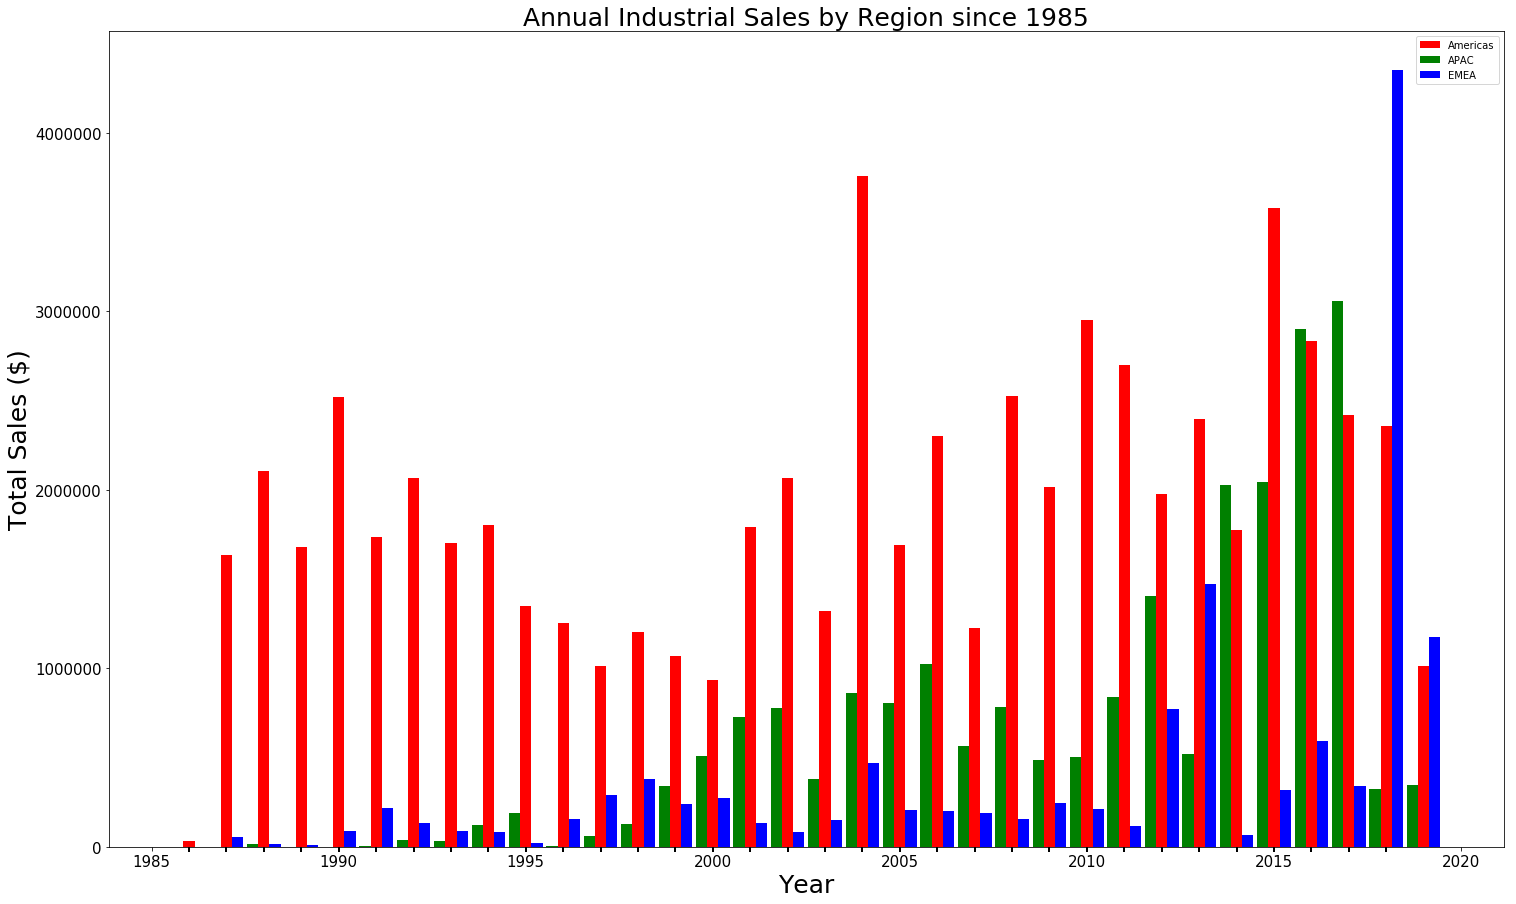

In [59]:
dfyeari1 = dfyear[dfyear.Type=='Industrial']
xyeari_am = list(dfyeari1['Year'])
xyeari_APAC = list(dfyeari1['Year']-.3)
xyeari_EMEA = list(dfyeari1['Year']+0.3)

dfyeari1 = dfyeari1[dfyeari1.columns[2:]].replace('[\$,]', '', regex=True).astype(float)
yyeari_am = list(dfyeari1['Americas'])
yyeari_APAC = list(dfyeari1['APAC'])
yyeari_EMEA = list(dfyeari1['EMEA'])

figyeari1, axyeari1 = plt.subplots(figsize=(25,15))

axyeari1.bar(xyeari_am, yyeari_am, width=0.3, color='r',align='center')
axyeari1.bar(xyeari_APAC, yyeari_APAC, width=0.3, color='g',align='center')
axyeari1.bar(xyeari_EMEA, yyeari_EMEA, width=0.3, color='b',align='center')
axyeari1.tick_params(axis='both',which='major',labelsize=15)
axyeari1.tick_params(axis='both',which='minor',length=5,width=2)
axyeari1.set_xticks(np.arange(1986,max(xyeari_am),1),minor=True)
axyeari1.legend(['Americas','APAC','EMEA'], facecolor='w')
plt.ylabel('Total Sales ($)', size=25)
plt.xlabel('Year',size=25)

plt.title('Annual Industrial Sales by Region since 1985',size=25)

plt.show()


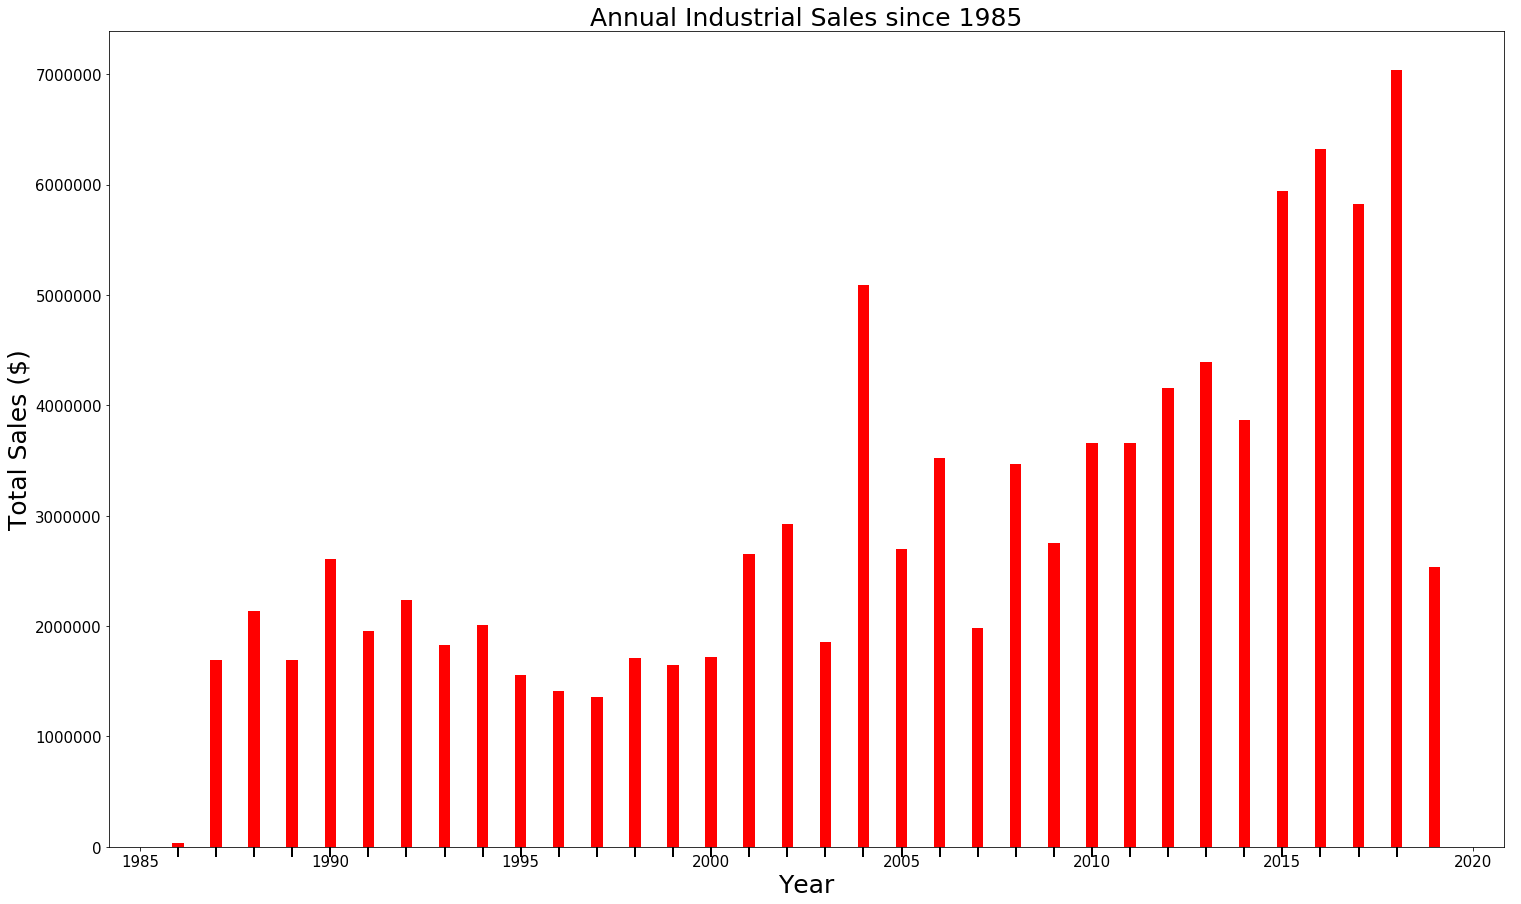

In [60]:
dfyeari1 = dfyear[dfyear.Type=='Industrial']
xyeari_total = list(dfyeari1['Year'])

dfyeari1 = dfyeari1[dfyeari1.columns[2:]].replace('[\$,]', '', regex=True).astype(float)
yyeari_total = list(dfyeari1['Total'])

figyeari1, axyeari1 = plt.subplots(figsize=(25,15))

axyeari1.bar(xyeari_total, yyeari_total, width=0.3, color='r',align='center')
axyeari1.tick_params(axis='both',which='major',labelsize=15)
axyeari1.tick_params(axis='both',which='minor',length=10,width=2)
axyeari1.set_xticks(np.arange(1986,max(xyeari_am),1),minor=True)
plt.ylabel('Total Sales ($)', size=25)
plt.xlabel('Year',size=25)

plt.title('Annual Industrial Sales since 1985',size=25)

plt.show()

In [61]:
dfyearm_i = dfyearmonth[dfyearmonth.Type=='Industrial']
dfyearm_i = dfyearm_i.rename(columns={'Year-Month':'YearMonth'})

dfyearm_i.YearMonth = pd.to_datetime(dfyearm_i.YearMonth)
dfyearm_i.YearMonth = dfyearm_i.YearMonth.dt.strftime('%m')
dfyearm_i.head()

,YearMonth,Type,Americas,Am Orders,APAC,APAC Orders,EMEA,EMEA Orders,Total,Total Orders
0,12,Industrial,"$34,181.88",14,$0.00,0,$0.00,0,"$34,181.88",14
1,01,Industrial,"$81,360.79",33,$0.00,0,$0.00,0,"$81,360.79",33
2,02,Industrial,"$148,702.45",54,$0.00,0,$0.00,0,"$148,702.45",54
3,03,Industrial,"$242,832.87",77,$0.00,0,"$3,256.00",3,"$246,088.87",80
4,04,Industrial,"$140,657.44",45,$0.00,0,$0.00,0,"$140,657.44",45


In [62]:
dfyearm_i2 = dfyearm_i.copy()
dfyearm_i2 = dfyearm_i2[dfyearm_i2.columns[2:]].replace('[\$,]', '', regex=True).astype(float)
dfyearm_i3 = dfyearm_i.copy()
dfyearm_i3['Americas']=dfyearm_i2['Americas']
dfyearm_i3['APAC']=dfyearm_i2['APAC']
dfyearm_i3['EMEA']=dfyearm_i2['EMEA']
dfyearm_i3['Total']=dfyearm_i2['Total']
#dfyearm_i3.head()

dfyearm_i3 = dfyearm_i3.groupby(['YearMonth']).agg({'Americas': 'mean','Am Orders':'mean','APAC':'mean','APAC Orders':'mean','EMEA':'mean','EMEA Orders':'mean','Total':'mean','Total Orders':'mean'}).reset_index()
dfyearm_i3      


,YearMonth,Americas,Am Orders,APAC,APAC Orders,EMEA,EMEA Orders,Total,Total Orders
0,01,144800.581212,30.151515,64238.496364,1.545455,16171.928788,2.000000,225211.006364,33.696970
1,02,168008.912121,31.393939,36734.886061,1.393939,46620.306970,2.969697,251364.104848,35.757576
2,03,172175.223636,34.696970,37969.900606,2.121212,28389.308485,3.181818,238534.432727,40.000000
3,04,224929.720909,31.909091,69722.284242,1.969697,20251.912121,2.848485,314903.917273,36.727273
4,05,162868.521212,31.575758,74795.931212,2.000000,40882.122424,2.484848,278546.574545,36.060606
5,06,152281.116563,29.281250,78954.041563,2.406250,31963.827812,2.968750,263198.985937,34.656250
6,07,167072.520625,28.218750,44062.334687,2.093750,12643.728437,2.156250,223778.583750,32.468750
7,08,152665.432812,31.500000,45931.396562,2.375000,13737.168438,2.437500,212333.997813,36.312500
8,09,169866.852813,29.125000,52003.180313,2.343750,17372.860625,2.718750,239242.893750,34.187500
9,10,174892.901250,30.593750,54197.264062,1.937500,22152.654375,2.937500,251242.819687,35.468750


In [63]:
dfyearm_i4 = dfyearm_i3.copy()
dfyearm_i4.insert(3, 'Am $/Order',dfyearm_i4['Americas']/dfyearm_i4['Am Orders'])
dfyearm_i4.insert(6, 'APAC $/Order',dfyearm_i4['APAC']/dfyearm_i4['APAC Orders'])
dfyearm_i4.insert(9, 'EMEA $/Order',dfyearm_i4['EMEA']/dfyearm_i4['EMEA Orders'])
dfyearm_i4


,YearMonth,Americas,Am Orders,Am $/Order,APAC,APAC Orders,APAC $/Order,EMEA,EMEA Orders,EMEA $/Order,Total,Total Orders
0,01,144800.581212,30.151515,4802.431337,64238.496364,1.545455,41566.085882,16171.928788,2.000000,8085.964394,225211.006364,33.696970
1,02,168008.912121,31.393939,5351.635232,36734.886061,1.393939,26353.287826,46620.306970,2.969697,15698.674796,251364.104848,35.757576
2,03,172175.223636,34.696970,4962.255354,37969.900606,2.121212,17900.096000,28389.308485,3.181818,8922.354095,238534.432727,40.000000
3,04,224929.720909,31.909091,7049.079573,69722.284242,1.969697,35397.467385,20251.912121,2.848485,7109.713830,314903.917273,36.727273
4,05,162868.521212,31.575758,5158.024184,74795.931212,2.000000,37397.965606,40882.122424,2.484848,16452.561463,278546.574545,36.060606
5,06,152281.116563,29.281250,5200.635784,78954.041563,2.406250,32812.069221,31963.827812,2.968750,10766.763053,263198.985937,34.656250
6,07,167072.520625,28.218750,5920.620886,44062.334687,2.093750,21044.697164,12643.728437,2.156250,5863.758116,223778.583750,32.468750
7,08,152665.432812,31.500000,4846.521677,45931.396562,2.375000,19339.535395,13737.168438,2.437500,5635.761410,212333.997813,36.312500
8,09,169866.852813,29.125000,5832.338294,52003.180313,2.343750,22188.023600,17372.860625,2.718750,6390.017701,239242.893750,34.187500
9,10,174892.901250,30.593750,5716.621900,54197.264062,1.937500,27972.781452,22152.654375,2.937500,7541.329149,251242.819687,35.468750


In [64]:
dfyear_i = dfyear.copy()
dfyear_i

,Year,Type,Americas,Am Orders,APAC,APAC Orders,EMEA,EMEA Orders,Total,Total Orders
0,1986,Industrial,"$34,181.88",14,$0.00,0,$0.00,0,"$34,181.88",14
1,1987,Industrial,"$1,633,017.42",466,$0.00,0,"$57,679.00",6,"$1,690,696.42",472
2,1988,Industrial,"$2,107,702.98",483,"$15,371.59",4,"$15,956.70",9,"$2,139,031.27",496
3,1989,Industrial,"$1,678,828.71",494,$55.00,4,"$10,446.00",5,"$1,689,329.71",503
4,1990,Industrial,"$2,519,181.82",621,$67.32,5,"$88,022.66",37,"$2,607,271.80",663
5,1991,Industrial,"$1,735,941.14",606,"$3,578.06",10,"$218,853.55",35,"$1,958,372.75",651
6,1992,Industrial,"$2,065,393.98",513,"$40,449.81",13,"$132,635.74",26,"$2,238,479.53",552
7,1993,Industrial,"$1,702,154.87",437,"$34,715.30",8,"$90,216.37",27,"$1,827,086.54",472
8,1994,Industrial,"$1,805,677.58",386,"$121,060.92",25,"$83,775.95",25,"$2,010,514.45",436
9,1995,Industrial,"$1,349,359.16",351,"$187,765.53",26,"$21,948.51",26,"$1,559,073.20",403


In [65]:
dfyear_i = dfyear.copy()
dfyear_i = dfyear_i[dfyear_i.Type=="Industrial"]
dfyear_i2 = dfyear_i[dfyear_i.columns[2:]].replace('[\$,]', '', regex=True).astype(float)

dfyear_i['Americas']=dfyear_i2['Americas']
dfyear_i['APAC']=dfyear_i2['APAC']
dfyear_i['EMEA']=dfyear_i2['EMEA']
dfyear_i['Total']=dfyear_i2['Total']

dfyear_i.insert(4, 'Am $/Order',dfyear_i['Americas']/dfyear_i['Am Orders'])
dfyear_i.insert(7, 'APAC $/Order',dfyear_i['APAC']/dfyear_i['APAC Orders'])
dfyear_i.insert(10, 'EMEA $/Order',dfyear_i['EMEA']/dfyear_i['EMEA Orders'])
dfyear_i.insert(13, 'Total $/Order',dfyear_i['Total']/dfyear['Total Orders'])
#dfyearm_i2 = dfyear.copy()
#dfyearm_i2['Americas']=dfyearm_i2['Americas']
#dfyearm_i3['APAC']=dfyearm_i2['APAC']
#dfyearm_i3['EMEA']=dfyearm_i2['EMEA']
#dfyearm_i3['Total']=dfyearm_i2['Total']

dfyear_i

,Year,Type,Americas,Am Orders,Am $/Order,APAC,APAC Orders,APAC $/Order,EMEA,EMEA Orders,EMEA $/Order,Total,Total Orders,Total $/Order
0,1986,Industrial,34181.88,14,2441.562857,0.00,0,NaN,0.00,0,NaN,34181.88,14,2441.562857
1,1987,Industrial,1633017.42,466,3504.329227,0.00,0,NaN,57679.00,6,9613.166667,1690696.42,472,3581.983941
2,1988,Industrial,2107702.98,483,4363.774286,15371.59,4,3842.897500,15956.70,9,1772.966667,2139031.27,496,4312.563044
3,1989,Industrial,1678828.71,494,3398.438684,55.00,4,13.750000,10446.00,5,2089.200000,1689329.71,503,3358.508370
4,1990,Industrial,2519181.82,621,4056.653494,67.32,5,13.464000,88022.66,37,2378.990811,2607271.80,663,3932.536652
5,1991,Industrial,1735941.14,606,2864.589340,3578.06,10,357.806000,218853.55,35,6252.958571,1958372.75,651,3008.253072
6,1992,Industrial,2065393.98,513,4026.109123,40449.81,13,3111.523846,132635.74,26,5101.374615,2238479.53,552,4055.216540
7,1993,Industrial,1702154.87,437,3895.091236,34715.30,8,4339.412500,90216.37,27,3341.347037,1827086.54,472,3870.946059
8,1994,Industrial,1805677.58,386,4677.921192,121060.92,25,4842.436800,83775.95,25,3351.038000,2010514.45,436,4611.271674
9,1995,Industrial,1349359.16,351,3844.328091,187765.53,26,7221.751154,21948.51,26,844.173462,1559073.20,403,3868.667990


In [66]:
dfyear_i1 = dfyear_i.copy()




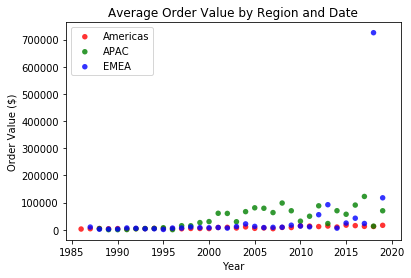

In [67]:
xyeari_am = list(dfyear_i1['Year'])
xyeari_APAC = list(dfyear_i1['Year'])
xyeari_EMEA = list(dfyear_i1['Year'])

yyeari_am_o = list(dfyear_i1['Am $/Order'])
yyeari_APAC_o = list(dfyear_i1['APAC $/Order'])
yyeari_EMEA_o = list(dfyear_i1['EMEA $/Order'])
#data.iloc[:,0]

g1 = (xyeari_am, yyeari_am_o)
g2 = (xyeari_APAC, yyeari_APAC_o)
g3 = (xyeari_EMEA, yyeari_EMEA_o)

data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("Americas", "APAC", "EMEA")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Average Order Value by Region and Date')
plt.xlabel('Year')
plt.ylabel('Order Value ($)')
plt.legend(loc=2)
plt.show()

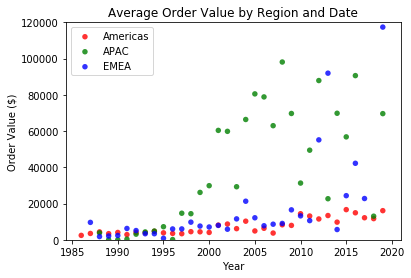

In [68]:
xyeari_am = list(dfyear_i1['Year'])
xyeari_APAC = list(dfyear_i1['Year'])
xyeari_EMEA = list(dfyear_i1['Year'])

yyeari_am_o = list(dfyear_i1['Am $/Order'])
yyeari_APAC_o = list(dfyear_i1['APAC $/Order'])
yyeari_EMEA_o = list(dfyear_i1['EMEA $/Order'])
#data.iloc[:,0]

g1 = (xyeari_am, yyeari_am_o)
g2 = (xyeari_APAC, yyeari_APAC_o)
g3 = (xyeari_EMEA, yyeari_EMEA_o)

data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("Americas", "APAC", "EMEA")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Average Order Value by Region and Date')
plt.xlabel('Year')
plt.ylabel('Order Value ($)')
plt.ylim(0,120000)
plt.legend(loc=2)
plt.show()

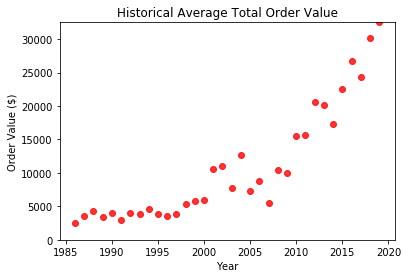

In [69]:
xyeari_total = list(dfyear_i1['Year'])
yyeari_total_o = list(dfyear_i1['Total $/Order'])

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(xyeari_total, yyeari_total_o, alpha=0.8, c="red")

plt.title('Historical Average Total Order Value')
plt.xlabel('Year')
plt.ylabel('Order Value ($)')
plt.ylim(0,max(yyeari_total_o))
plt.show()

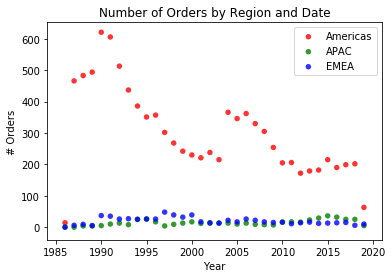

In [70]:
xyeari_am = list(dfyear_i1['Year'])
xyeari_APAC = list(dfyear_i1['Year'])
xyeari_EMEA = list(dfyear_i1['Year'])

yyeari_am_o = list(dfyear_i1['Am Orders'])
yyeari_APAC_o = list(dfyear_i1['APAC Orders'])
yyeari_EMEA_o = list(dfyear_i1['EMEA Orders'])
#data.iloc[:,0]

g1 = (xyeari_am, yyeari_am_o)
g2 = (xyeari_APAC, yyeari_APAC_o)
g3 = (xyeari_EMEA, yyeari_EMEA_o)

data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("Americas", "APAC", "EMEA")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Number of Orders by Region and Date')
plt.xlabel('Year')
plt.ylabel('# Orders')
plt.legend(loc=1)
plt.show()

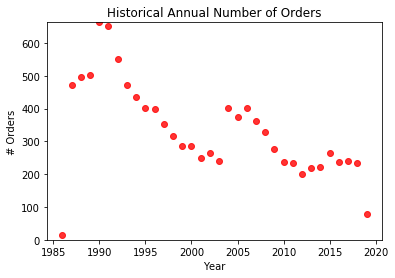

In [71]:
xyeari_total = list(dfyear_i1['Year'])
yyeari_total_o = list(dfyear_i1['Total Orders'])

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(xyeari_total, yyeari_total_o, alpha=0.8, c="red")

plt.title('Historical Annual Number of Orders')
plt.xlabel('Year')
plt.ylabel('# Orders')
plt.ylim(0,max(yyeari_total_o))
plt.show()

Annual sales have historically been approximately \\$2m until the mid-2000s, when total sales began to increase to approximately \\$3m average. Annual sales increased again in 2015 to approximately \\$6m. Sales seem to have reached a plateau over the past 3 to 4 years. Americas have historically generated the majority of annual sales, followed by APAC and then by EMEA. 2018 was the first year where sales from EMEA or APAC exceeded that from Americas. The reason is due to an unusually large order in 2018 for about \\$4.2m. 
Annual medical sales has steadily declined from \\$3m annual sales in 2006 to \\$1m in 2018. 
Annual number of orders has been trending downwards, while average value per order has increased. Average number of industrial orders has decreased by 60% since early 90s, from 600 annual orders to about 250 in 2018. The average value of orders has increased tenfold since sales data was introduced in 1985, from about \\$3,000 per order to about \\$30,000 in 2018. This may be an indication of the following:
1. More efficient sales processes 
2. Price elasticity of demand is relatively inelastic, since sales have increased while number of orders has decreased.
3. Price increases have exceeded the inflation rate, since \\$100 in 1985 is equivalent to \\$237.50 in 2019, only accounting for an increase of 137%. Average order value has increased approximately 1000% over the same time period.